In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import math

import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual
from ipywidgets import FloatSlider

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans

<IPython.core.display.Javascript object>

In [3]:
timbre_cov_df = pd.read_csv("../data/timbre_df.csv", index_col=0)
timbre_cov_df.index = timbre_cov_df["id"]
timbre_cov_df = timbre_cov_df.drop("id", 1)
timbre_cov_df.head(2)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t9-t9,t10-t9,t11-t9,t0-t10,t1-t10,t10-t10,t0-t11,t1-t11,t10-t11,t11-t11
id,,,,,,,,,,,,,,,,,,,,,
1oK6IuZqBqljKHS3bFNUg7,51.823612,20.298719,-7.290977,-11.141729,27.893418,-17.370409,2.325935,-5.247523,7.916673,1.860364,...,293.081866,-9.255381,12.45546,-3.977513,-48.312000,261.299412,-7.627733,-75.358357,-16.209842,174.110043
1MSY5BfSg3wmtUFmtSBjs5,42.902985,57.353380,-8.897260,0.845510,34.859784,-18.322556,-10.257845,2.666678,-3.077387,6.007564,...,325.858969,-35.039057,0.69071,2.864370,78.139559,289.719916,-5.924260,57.640365,-25.937092,187.967932


<IPython.core.display.Javascript object>

In [4]:
english_cleaned = pd.read_csv("../data/cleaned_english.csv", index_col=0)
english_cleaned.head(2)

,original,cleaned,lang,fm_tag,cleaned_2
id,,,,,
1oK6IuZqBqljKHS3bFNUg7,Puff puff pass and I'm in that\nCircle with my...,puff puff pass circl boy roll weed zig zag lig...,en,conscious rap,puff puff pass circl boy roll weed zig zag lig...
1MSY5BfSg3wmtUFmtSBjs5,"Yo, what's happenin Cold 187\nYo man, you know...",yo happenin cold yo man know laid back studio ...,en,gangsta rap,yo happenin cold yo laid studio homi dre balli...


<IPython.core.display.Javascript object>

In [7]:
tagged = timbre_cov_df.loc[english_cleaned.index, :]

<IPython.core.display.Javascript object>

In [8]:
X = tagged
y = english_cleaned["fm_tag"]
drop_cols = ["t2-t2", "t3-t3", "t5-t5", "t7-t7", "t9-t9", "t10-t10"]

X = X.drop(drop_cols, 1)

<IPython.core.display.Javascript object>

In [9]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)
umap = UMAP(
    n_components=2,
    n_neighbors=40,
    min_dist=0.001,
    metric="cosine",
    random_state=42,
)
umap_df = pd.DataFrame(umap.fit_transform(std_X), columns=["c0", "c1"])
umap_df["fm_tag"] = y.values

<IPython.core.display.Javascript object>

/home/b1t/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c0', ylabel='c1'>

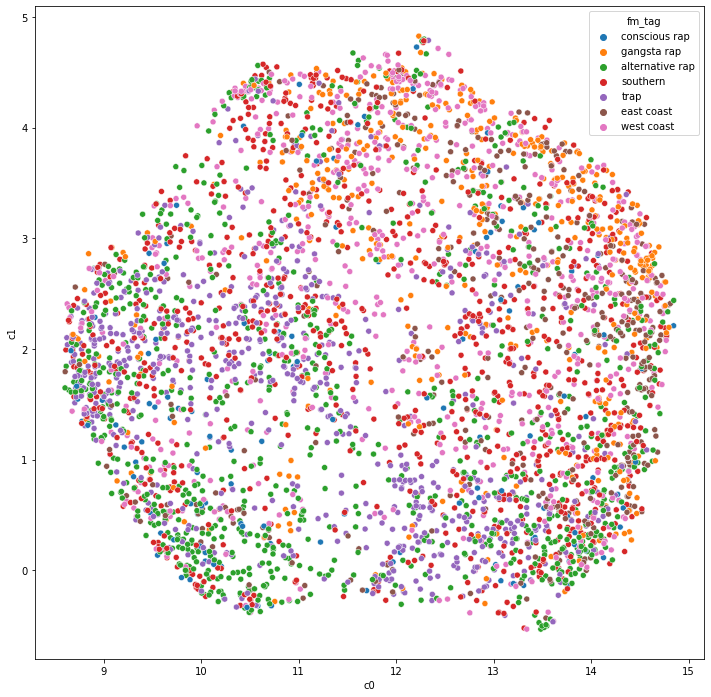

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", data=umap_df, hue="fm_tag")

In [12]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

<IPython.core.display.Javascript object>

In [13]:
tfidf = TfidfVectorizer(min_df=2)
vectorized = tfidf.fit_transform(english_cleaned["cleaned"])

<IPython.core.display.Javascript object>

In [15]:
tfidf_df = pd.DataFrame(
    vectorized.toarray(), columns=tfidf.get_feature_names(), index=english_cleaned.index
)

<IPython.core.display.Javascript object>

In [16]:
english_df = tagged.join(tfidf_df, how="inner")

<IPython.core.display.Javascript object>

In [20]:
X = english_df
y = english_cleaned["fm_tag"]

<IPython.core.display.Javascript object>

In [21]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)
umap = UMAP(
    n_components=2,
    n_neighbors=40,
    min_dist=0.001,
    metric="cosine",
    random_state=42,
)
umap_df = pd.DataFrame(umap.fit_transform(std_X), columns=["c0", "c1"])
umap_df["fm_tag"] = y.values

<IPython.core.display.Javascript object>

/home/b1t/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='c0', ylabel='c1'>

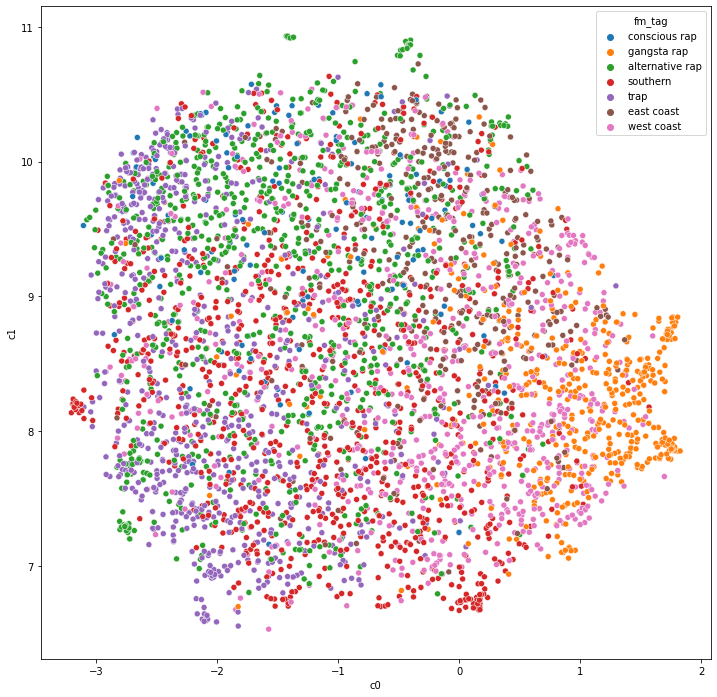

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(12, 12))
sns.scatterplot("c0", "c1", data=umap_df, hue="fm_tag")